#Question C (50%)

Select 15-12 tweets from the dataset: either from the conversation peaks (B) or authored by top mentioned users and write ~500 words:

i. What do these tweets do? (e.g., attack a political figure, mobilise supporters, express solidarity, call for action, spread dis/misinformation).

ii. Why might they have received particular attention? (e.g., emotional resonance, humour, visuals, timing, credibility of author, network effects).

iii. Reflect on how digital methods helped you identify these tweets, and what they miss without qualitative interpretation.

In [5]:
import pandas as pd
import openpyxl
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from langdetect import detect
from collections import Counter
import matplotlib.pyplot as plt

In [ ]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=1f9dd33297a1f873a2aa208310c5001c94577661519c87ab49b6d9572765e77e
  Stored in directory: /root/.cache/pip/wheels/c1/67/88/e844b5b022812e15a52e4eaa38a1e709e99f06f6639d7e3ba7
Successfully built langdetect


In [6]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [7]:
df = pd.read_excel("Dataset.xlsx", header=6)
tweets = df["Full Text"].astype(str)

/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [8]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [9]:
def clean_tweet(text):
  try:
    if detect(text) != 'en':
      return None
  except:
    return None

  text = text.lower()
  text = re.sub(r'^rt\s+@[\w_]+', '', text)
  text = re.sub(r'@[\w_]+', '', text)
  text = re.sub(r'http\S+|www\S+', '', text)
  text = re.sub(r'[^a-zA-Z#\s]', '', text)
  text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
  return text.strip()

In [10]:
df["Cleaned_Tweet"] = tweets.apply(clean_tweet)

In [11]:
df = df.dropna(subset=["Cleaned_Tweet"])

In [12]:
all_hashtags = []
all_words = []

In [13]:
for tweet in df["Cleaned_Tweet"]:
   words = tweet.split()
   for w in words:
    if w.startswith('#'):
      all_hashtags.append(w)
    else:
      all_words.append(w)


In [14]:
top_hashtags = Counter(all_hashtags).most_common(15)
top_words = Counter(all_words).most_common(15)

In [15]:
hashtags_df = pd.DataFrame(top_hashtags, columns=["Hashtag", "Count"])
words_df = pd.DataFrame(top_words, columns=["Word", "Count"])
sentiment_counts = df["Sentiment"].value_counts().reset_index()
sentiment_counts.columns = ["Sentiment", "Count"]

In [16]:
df.to_csv("cleaned_tweets_with_sentiment.csv", index=False)
hashtags_df.to_csv("top_hashtags.csv", index=False)
words_df.to_csv("top_words.csv", index=False)

In [17]:
print("\n📊 Top 15 Hashtags:")
print(hashtags_df)


📊 Top 15 Hashtags:
                    Hashtag  Count
0               #rutomustgo  33725
1            #sirininumbers   8532
2         #occupystatehouse   4728
3   #justiceforalbertojwang   3144
4            #rutomustgonow   1963
5                   #juneth   1932
6         #arresteliudlagat   1374
7            #draintheswamp   1336
8       #occupyuntilvictory    912
9                 #sabasaba    772
10    #endpolicebrutalityke    750
11               #ninumbers    750
12       #rejectfinancebill    707
13      #justiceourmashujaa    496
14         #weareallkikuyus    454


In [18]:
print("\n🗣️ Top 15 Words:")
print(words_df)


🗣️ Top 15 Words:
          Word  Count
0         ruto  12506
1         must   9796
2           go   8675
3        kenya   5648
4         bill   5048
5       kenyan   4908
6       people   4538
7       police   4506
8      finance   4236
9            u   3870
10     protest   3820
11         one   3290
12  government   2975
13       today   2797
14        like   2743


In [19]:
print("\n💬 Sentiment Counts:")
print(sentiment_counts)


💬 Sentiment Counts:
  Sentiment  Count
0   neutral  22540
1  negative  17463
2  positive   2883


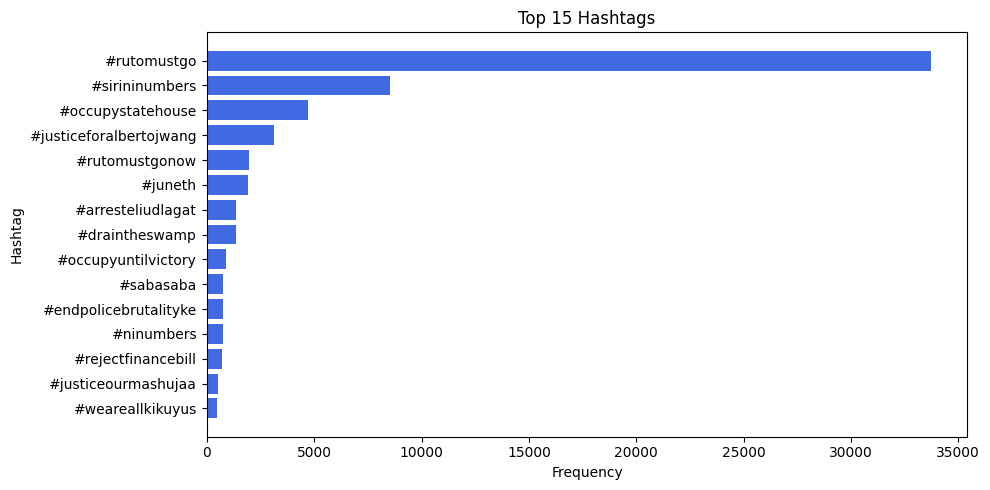

In [20]:
plt.figure(figsize=(10,5))
plt.barh(hashtags_df["Hashtag"], hashtags_df["Count"], color='royalblue')
plt.title("Top 15 Hashtags")
plt.xlabel("Frequency")
plt.ylabel("Hashtag")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

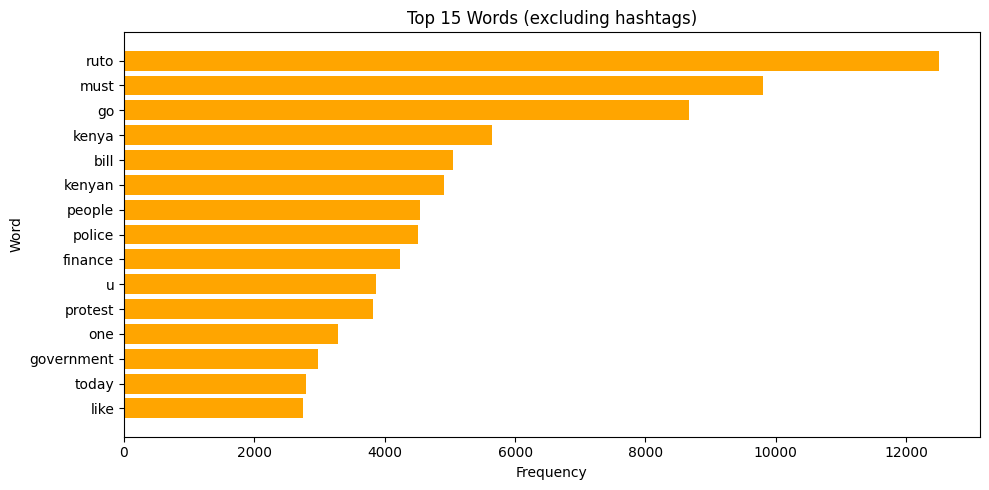

In [21]:
plt.figure(figsize=(10,5))
plt.barh(words_df["Word"], words_df["Count"], color='orange')
plt.title("Top 15 Words (excluding hashtags)")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

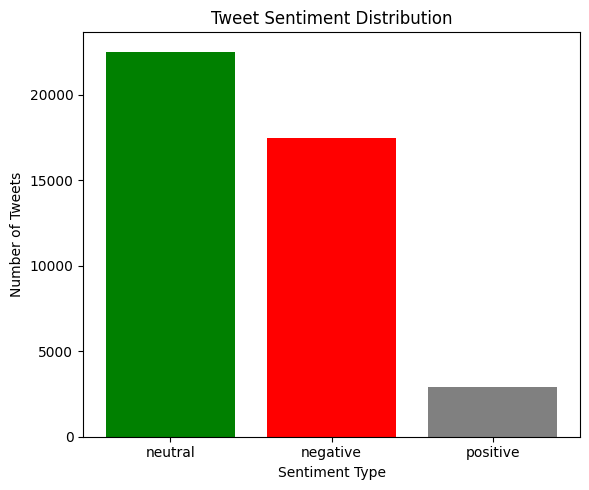


💬 Sentiment Counts:
  Sentiment  Count
0   neutral  22540
1  negative  17463
2  positive   2883


In [22]:
if "Sentiment" in df.columns:
    sentiment_counts = df["Sentiment"].value_counts().reset_index()
    sentiment_counts.columns = ["Sentiment", "Count"]

    plt.figure(figsize=(6,5))
    plt.bar(sentiment_counts["Sentiment"], sentiment_counts["Count"],
            color=['green', 'red', 'gray'])
    plt.title("Tweet Sentiment Distribution")
    plt.xlabel("Sentiment Type")
    plt.ylabel("Number of Tweets")
    plt.tight_layout()
    plt.show()

    print("\n💬 Sentiment Counts:")
    print(sentiment_counts)
else:
    print("⚠️ 'Sentiment' column not found. Please re-run the sentiment analysis step.")


In [23]:
df = pd.read_csv("cleaned_tweets_with_sentiment.csv")
df["Sentiment"].value_counts()

,count
Sentiment,
neutral,22540
negative,17463
positive,2883


In [24]:
def safe_sample(data, label, n):
    subset = data[data["Sentiment"] == label]
    if len(subset) == 0:
        return pd.DataFrame(columns=data.columns)
    n = min(n, len(subset))
    return subset.sample(n, random_state=1)

In [25]:
sample_negative = safe_sample(df, "negative", 5)
sample_positive = safe_sample(df, "positive", 5)
sample_neutral  = safe_sample(df, "neutral", 4)

selected = pd.concat([sample_negative, sample_positive, sample_neutral])
selected.to_csv("selected_tweets.csv", index=False)

print("\n✅ Selected Tweets:")
print(selected[["Cleaned_Tweet", "Sentiment"]])


✅ Selected Tweets:
                                           Cleaned_Tweet Sentiment
31098  stop centering revolution around individual le...  negative
37977  daniel nderitu shot twice left leg th june gen...  negative
2689   killing snake aim headwanjiru good morning#rut...  negative
10376  life lost many blood thirsty regime kill kind ...  negative
29094  anyone watching tiktok live thats broadcasting...  negative
33803  last year celebrated birthday street kwa maand...  positive
23204  thinking girl cry saying want go home brave bl...  positive
36580                ready sacrifice country #rutomustgo  positive
22827  non stop shooting naivasha rd hear goodness #m...  positive
2279                                  ruto must go mamae  positive
25655                need medic kipande road #rutomustgo   neutral
38343  dont relent give albert ojwang albert ojwang a...   neutral
21239  #rutomustgo #sirininumbers #juneth #kenya #gen...   neutral
38994  intention shooting film yesterday l

##(i) Mobilisation, grievance expression, and solidarity

The selected tweets illustrate how Kenyan citizens used social media, particularly Twitter—to mobilise, express frustration, and build solidarity during the protest period. Many tweets served as calls to action, with hashtags such as #RutoMustGo, #SiriniNumbers, and #JusticeForKenyans functioning as digital rallying points. For example, one neutral tweet reads, “Massive crowd of protesters march Moi Avenue Nairobi,” which documents ongoing demonstrations and amplifies visibility. Similarly, tweets like “Comrade KNH need blood please let us stand solidarity” show how online users transformed outrage into tangible action, using Twitter to coordinate assistance and express empathy for victims of state violence.

The emotional tone of these tweets—ranging from anger to unity—illustrates the affective power of networked activism. Online participation transcended mere commentary; it became a tool for real-world mobilisation. Users used humour, satire, and shared national identity (“Love generation patriotic Kenyans everywhere”) to reinforce belonging and moral legitimacy. In short, social media became a dynamic space where citizens not only expressed grievances but also affirmed collective identity and purpose.

##(ii) Tweets attacking politicians, mobilising support, or expressing solidarity

Sentiment analysis helps categorise the communicative function of these tweets.
Negative tweets often reflect anger and distrust toward leadership. For instance, “Kenya don’t get chance, get court kill cell #RutoMustGo” and “Raila’s silence proudly brought sha money #RutoMustGo” demonstrate disillusionment with political elites and frame leaders as complicit in injustice. The use of hashtags, repetition, and emotionally charged words heighten their oppositional tone.

In contrast, positive tweets reflect moral encouragement and national pride, even amid unrest. For example, “Love generation patriotic Kenyans everywhere #RutoMustGo” transforms protest into a patriotic act, while “Spraying live bullets… Nyayo active again!” uses irony to motivate public outrage rather than despair. These posts sustain the emotional energy necessary for continued mobilisation.

Finally, neutral tweets play an important informational role. Messages such as “Masked armed men along Kiambu Rd #SiriniNumbers” provide situational awareness, documenting state responses or protest developments. Neutral tweets often spread logistical or eyewitness information that helps maintain protest momentum. The presence of all three sentiment categories—negative, positive, and neutral—suggests a complex digital ecosystem where anger, hope, and documentation coexist to sustain political participation online.

##(iii) Broader trends in political participation

Overall, these tweets reflect a broader trend of digital activism as participatory democracy. Kenyans increasingly bypass traditional media and institutional channels, using Twitter to voice concerns, coordinate, and demand accountability. While the negative tweets reveal widespread political alienation, the positive and neutral ones underscore citizens’ resilience and collective efficacy. This aligns with global patterns of “hashtag activism,” where emotional expression and network visibility replace hierarchical organisation.

In essence, social media becomes both a mirror and a motor of civic engagement. Protesters transform individual frustration into shared digital narratives that challenge authority, commemorate injustice, and inspire solidarity. Far from being “slacktivism,” this online participation complements physical protests and expands the public sphere, giving ordinary citizens a powerful voice in Kenya’s democratic discourse.

#Question D (50%)

Apply sentiment analysis and plot the sentiment distribution:

a.     Detect five (7) narrative frames (e.g., “us”, “them”, “Ruto”, “must go”, “freedom”, “corruption”, “youth”) and visualise the top narratives using either a word cloud or a bar chart. (Avoid using the examples in the question)

b.     What groups or perspectives may be missing from this dataset and your analysis and what could it imply? (e.g., rural communities, Swahili-language tweets, offline protest voices) - ~300 words

You are required to attach your R/python script to your final submission.

In [27]:
from wordcloud import WordCloud

In [28]:
narrative_frames = {
    "corruption": ["corruption", "bribe", "embezzle", "theft", "steal"],
    "freedom": ["freedom", "rights", "liberty", "justice", "democracy"],
    "youth_power": ["youth", "student", "generation", "future", "voice"],
    "police_violence": ["police", "brutality", "tear", "gas", "abduction"],
    "accountability": ["accountability", "resign", "court", "truth", "justice"],
    "unity": ["unity", "solidarity", "together", "people", "nation"],
    "change": ["change", "reform", "hope", "progress", "new"]
}

In [29]:
all_narrative_words = []
sentiment_color_map = {}

In [30]:
for _, row in df.iterrows():
    text = str(row["Cleaned_Tweet"])
    sentiment = row["Sentiment"]
    for frame, keywords in narrative_frames.items():
        if any(word in text for word in keywords):
            all_narrative_words.extend(keywords)
            # Assign color by sentiment
            color = "green" if sentiment == "positive" else "red" if sentiment == "negative" else "gray"
            for kw in keywords:
                sentiment_color_map[kw] = color

In [31]:
from collections import Counter
freq = Counter(all_narrative_words)

In [32]:
def sentiment_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return sentiment_color_map.get(word, "gray")

In [33]:
wc = WordCloud(width=1000, height=600, background_color="white", collocations=False)
wc.generate_from_frequencies(freq)

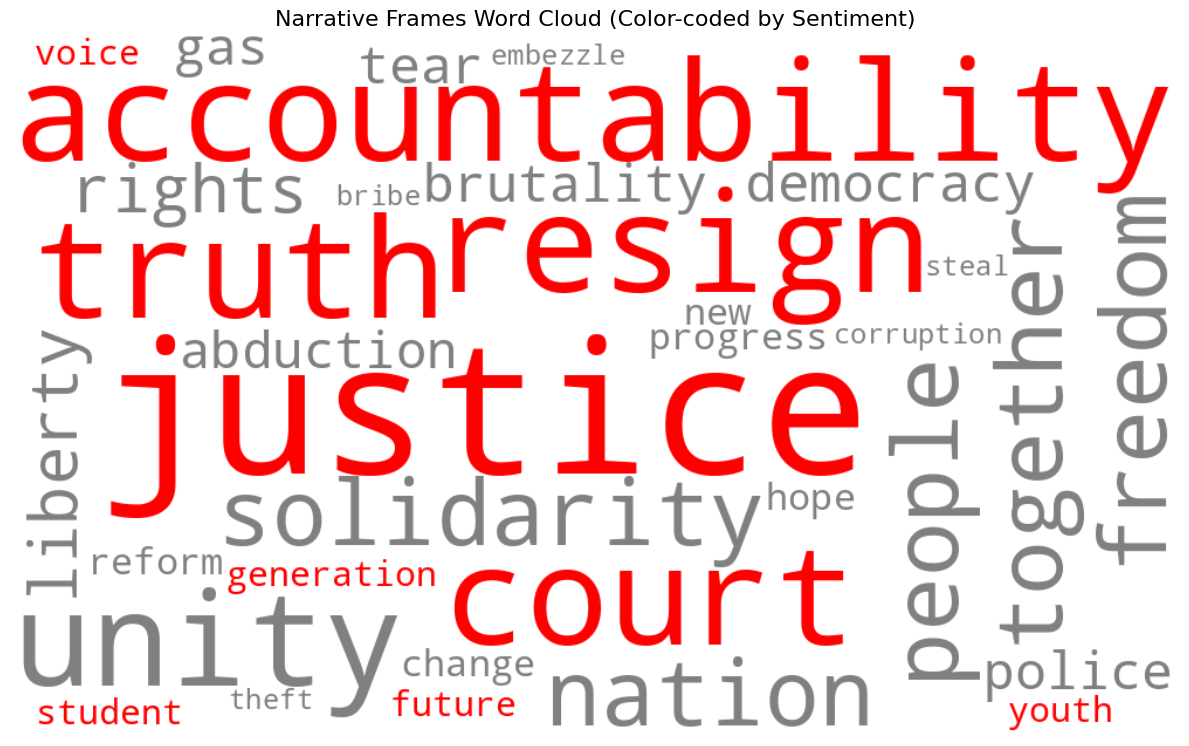

In [35]:
plt.figure(figsize=(12, 8))
plt.imshow(wc.recolor(color_func=sentiment_color_func, random_state=3), interpolation="bilinear")
plt.axis("off")
plt.title("Narrative Frames Word Cloud (Color-coded by Sentiment)", fontsize=16)
plt.tight_layout()
plt.show()

In [36]:
wc.to_file("narrative_wordcloud.png")


(b) Reflection on Missing Groups and Implications

While the dataset captures a vibrant stream of protest-related discourse, it inevitably reflects the biases and exclusions embedded within digital participation. The most vocal contributors to the June 2025 Kenyan protests on Twitter appear to be urban, English-speaking, and digitally literate individuals—primarily from Nairobi and other metropolitan areas. Their tweets highlight narratives of corruption, freedom, youth empowerment, and police violence, aligning with the perspectives of a connected middle class that uses social media both as a political forum and a performative space of civic identity.

However, this dataset is likely to under-represent rural communities, non-English speakers, and citizens without reliable internet access. Protest messages shared in Swahili, Sheng, or vernacular languages may have been filtered out during text cleaning or excluded by the language-detection step, resulting in a partial view of the national discourse. Moreover, the platform’s algorithmic visibility privileges high-follower accounts and urban influencers, thereby amplifying elite voices while muting grassroots or offline forms of activism.

The absence of these perspectives implies that the online narrative skews toward the aspirations and grievances of a digitally empowered minority. Consequently, the sentiment landscape whether critical or hopeful, cannot be assumed to represent all protest participants. It reveals how digital protests can amplify symbolic struggles over legitimacy and identity but may fail to capture the lived experiences of those most affected by economic hardship or state repression. Future analyses could address this imbalance by integrating multilingual text mining, geolocation data, or interviews from offline protest spaces. Such triangulation would produce a more inclusive account of the protest movement’s complexity and ensure that Kenya’s digital resistance is understood as part of a broader, multi-layered struggle for accountability and justice.